In [31]:
## Fraud detection data cleaning for inpatient data
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [32]:
# import preprocessing routine
from preprocess_module import fraud_preprocessor

# call preprocessor 
full_df = fraud_preprocessor(i_flag=0)

In [83]:
ip_train_df = pd.read_csv('Train_Inpatientdata-1542865627584.csv',na_values=[''])
ip_test_df = pd.read_csv('Test_Inpatientdata-1542969243754.csv',na_values=[''])

In [84]:
print(ip_train_df.shape)
ip_train_df.head(10)

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [85]:
print(ip_test_df.shape)
ip_test_df.head(10)

(9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BENE11090,CLM56552,2009-06-21,2009-06-22,PRV55544,1000,PHY405478,NaN,NaN,2009-06-21,...,34590,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BENE11099,CLM52386,2009-05-23,2009-05-26,PRV53275,3000,PHY425441,NaN,NaN,2009-05-23,...,34690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BENE11127,CLM55284,2009-06-12,2009-06-23,PRV54989,4000,PHY357865,NaN,NaN,2009-06-12,...,25000,4280,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BENE11176,CLM55569,2009-06-14,2009-06-14,PRV57214,15000,PHY405200,PHY432053,NaN,2009-06-14,...,2760,486,99591,5856,4513.0,NaN,NaN,NaN,NaN,NaN
9,BENE11218,CLM65115,2009-08-24,2009-08-31,PRV52117,19000,PHY335369,PHY344060,NaN,2009-08-24,...,78720,49121,V850,NaN,9671.0,NaN,NaN,NaN,NaN,NaN


In [86]:
ip_df = pd.concat([ip_train_df,ip_test_df], axis=0).reset_index(drop = True)

In [87]:
print(ip_df.shape)
ip_df[40470:40480]

(50025, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40473,BENE159188,CLM69948,2009-09-28,2009-10-06,PRV54765,15000,PHY431177,PHY352941,NaN,2009-09-28,...,4019,2800,27801,NaN,1733.0,NaN,NaN,NaN,NaN,NaN
40474,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
40475,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
40476,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40477,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
40478,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40479,BENE11090,CLM56552,2009-06-21,2009-06-22,PRV55544,1000,PHY405478,NaN,NaN,2009-06-21,...,34590,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
full_df[['DeductibleAmtPaid']] # Deductible looks the same for all claims 

,DeductibleAmtPaid
0,1068.0
1,1068.0
2,1068.0
3,1068.0
4,1068.0
...,...
806488,0.0
806489,0.0
806490,0.0
806491,0.0


In [89]:
print(ip_df.apply(lambda x: np.sum(x.isna())).sort_values(ascending=False))
random.seed(33)
print('*'*50)
ip_df.loc[ip_df.AttendingPhysician.isna(),:].sample(10)

ClmProcedureCode_6        50025
ClmProcedureCode_5        50014
ClmProcedureCode_4        49880
ClmProcedureCode_3        48837
ClmDiagnosisCode_10       45211
OtherPhysician            44322
ClmProcedureCode_2        43317
ClmProcedureCode_1        21444
OperatingPhysician        20606
ClmDiagnosisCode_9        16735
ClmDiagnosisCode_8        12302
ClmDiagnosisCode_7         8994
ClmDiagnosisCode_6         6035
ClmDiagnosisCode_5         3613
ClmDiagnosisCode_4         1938
DeductibleAmtPaid          1095
ClmDiagnosisCode_3          845
ClmDiagnosisCode_2          280
AttendingPhysician          143
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
ClmDiagnosisCode_1            0
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DischargeDt                   0
DiagnosisGroupCode            0
BeneID                        0
dtype: int64
***************************

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
25431,BENE104312,CLM64141,2009-08-16,2009-08-24,PRV54337,5000,NaN,NaN,NaN,2009-08-16,...,2724,2930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3567,BENE23802,CLM33747,2009-01-14,2009-01-15,PRV56591,8000,NaN,NaN,NaN,2009-01-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22208,BENE92225,CLM76339,2009-11-17,2009-12-22,PRV56647,4000,NaN,NaN,NaN,2009-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7553,BENE38493,CLM63631,2009-08-13,2009-08-15,PRV55715,7000,NaN,NaN,NaN,2009-08-13,...,3051,4142,NaN,NaN,7935.0,2724.0,NaN,NaN,NaN,NaN
22463,BENE93199,CLM41078,2009-03-04,2009-03-13,PRV51490,0,NaN,NaN,NaN,2009-03-04,...,8670,40391,34590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,BENE14147,CLM47613,2009-04-19,2009-04-25,PRV54561,300,NaN,NaN,NaN,2009-04-19,...,60000,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20123,BENE84738,CLM75931,2009-11-14,2009-11-17,PRV54350,8000,NaN,NaN,NaN,2009-11-14,...,NaN,NaN,NaN,NaN,7915.0,NaN,NaN,NaN,NaN,NaN
2152,BENE18544,CLM34474,2009-01-19,2009-01-25,PRV52021,3000,NaN,NaN,NaN,2009-01-19,...,57140,2859,NaN,NaN,3722.0,7994.0,4414.0,NaN,NaN,NaN
11673,BENE54196,CLM64176,2009-08-17,2009-08-19,PRV52135,3000,NaN,NaN,NaN,2009-08-17,...,27542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42806,BENE47313,CLM59413,2009-07-12,2009-07-19,PRV57035,15000,NaN,NaN,NaN,2009-07-12,...,25000,42611,78720,NaN,5498.0,4019.0,NaN,NaN,NaN,NaN


In [90]:
full_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'ClaimMonth', 'HospitalDuration', 'ClaimDuration',
       'PatientType', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       '

In [91]:
ip_df.loc[ip_df.DeductibleAmtPaid.isna(),:].sample(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
27311,BENE111123,CLM44822,2009-03-30,2009-04-01,PRV57191,6000,PHY398500,NaN,NaN,2009-03-30,...,2948,4439,V0254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43201,BENE53601,CLM34414,2009-01-19,2009-01-26,PRV53112,0,PHY394041,PHY388415,NaN,2009-01-18,...,NaN,NaN,NaN,NaN,5771.0,NaN,NaN,NaN,NaN,NaN
49862,BENE156580,CLM54063,2009-06-03,2009-06-05,PRV52618,6000,PHY375160,NaN,NaN,2009-06-03,...,2724,V1046,41401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17120,BENE73886,CLM55175,2009-06-11,2009-06-15,PRV53424,4000,PHY399961,NaN,NaN,2009-06-11,...,V1301,5856,4280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6124,BENE33174,CLM34483,2009-01-19,2009-01-24,PRV51430,4000,PHY407977,NaN,NaN,2009-01-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16338,BENE71014,CLM68925,2009-09-21,2009-09-24,PRV51244,17000,PHY320108,PHY316610,NaN,2009-09-21,...,V4586,99672,2724,NaN,3783.0,2724.0,NaN,NaN,NaN,NaN
41847,BENE32332,CLM56564,2009-06-21,2009-06-24,PRV51073,38000,PHY323701,PHY334683,NaN,2009-06-21,...,2449,4260,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN
46005,BENE96837,CLM77119,2009-11-24,2009-12-10,PRV55253,16000,PHY328575,NaN,NaN,2009-11-24,...,78820,E8842,72888,78722,NaN,NaN,NaN,NaN,NaN,NaN
10977,BENE51494,CLM73773,2009-10-28,2009-11-01,PRV55435,11000,PHY403345,PHY403345,NaN,2009-10-28,...,NaN,NaN,NaN,NaN,9671.0,5849.0,NaN,NaN,NaN,NaN
12562,BENE57293,CLM73121,2009-10-23,2009-10-24,PRV57502,8000,PHY322141,PHY427202,NaN,2009-10-23,...,2720,V4586,NaN,NaN,437.0,4019.0,NaN,NaN,NaN,NaN


In [92]:
ip_df.loc[:,'DeductibleAmtPaid'].fillna(0, inplace = True)

In [93]:
ip_df.fillna('None', inplace = True)

In [94]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [95]:
ip_df = ip_df.astype(str)
ip_df.DeductibleAmtPaid=ip_df.DeductibleAmtPaid.astype(float)

In [96]:
ip_df.InscClaimAmtReimbursed=ip_df.InscClaimAmtReimbursed.astype(float)

In [97]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed    float64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [98]:
from datetime import date
ip_df['AdmissionDt'] = ip_df['AdmissionDt'].map(lambda x: date.fromisoformat(x))

In [99]:
ip_df['DischargeDt'] = ip_df['DischargeDt'].map(lambda x: date.fromisoformat(x))

In [100]:
ip_df['ClaimStartDt'] = ip_df['ClaimStartDt'].map(lambda x: date.fromisoformat(x))
ip_df['ClaimEndDt'] = ip_df['ClaimEndDt'].map(lambda x: date.fromisoformat(x))

In [101]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed    float64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [102]:
ip_df['HospitalDuration'] = ip_df['DischargeDt'] - ip_df['AdmissionDt']
ip_df['ClaimDuration'] = ip_df['ClaimEndDt'] - ip_df['ClaimStartDt']


In [103]:
#type(ip_df['DischargeDt'][1])


In [104]:
ip_df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,HospitalDuration,ClaimDuration
count,50025.000000,50025.000000,50025,50025
mean,10091.210395,1044.622489,5 days 16:28:28.137931,5 days 16:19:12
std,10305.627672,156.272717,5 days 16:11:59.583402,5 days 15:50:03.033281
min,0.000000,0.000000,0 days 00:00:00,0 days 00:00:00
25%,4000.000000,1068.000000,2 days 00:00:00,2 days 00:00:00
50%,7000.000000,1068.000000,4 days 00:00:00,4 days 00:00:00
75%,12000.000000,1068.000000,7 days 00:00:00,7 days 00:00:00
max,125000.000000,1068.000000,35 days 00:00:00,36 days 00:00:00


In [105]:
ip_df.describe(exclude=[np.number]) 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,50025,50025,50025,50025,50025,50025,50025,50025,50025,50025,...,50025,50025,50025,50025,50025,50025,50025,50025,50025,50025
unique,37418,50025,399,365,2612,14173,10105,3533,399,2081,...,2504,2438,2279,1039,1175,322,172,56,8,1
top,BENE117116,CLM31121,2009-02-26,2009-02-11,PRV53866,PHY422134,None,None,2009-02-26,78650,...,None,None,None,None,None,None,None,None,None,None
freq,11,1,179,181,604,386,20606,44322,178,2111,...,8994,12302,16735,45211,21444,43317,48837,49880,50014,50025


In [106]:
ip_df.Provider.value_counts()

PRV53866    604
PRV52019    516
PRV55462    386
PRV52618    345
PRV54367    322
           ... 
PRV51977      1
PRV52097      1
PRV55481      1
PRV51188      1
PRV52536      1
Name: Provider, Length: 2612, dtype: int64

### EDA

Text(0, 0.5, 'Count')

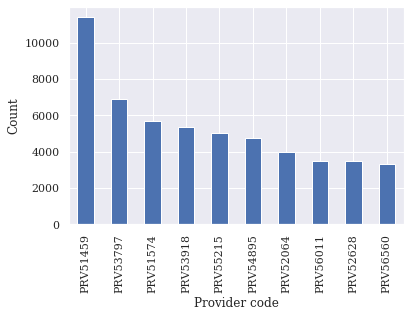

In [27]:
import seaborn as sns
sns.set(font='serif')
plt.figure()
full_df['Provider'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Provider code')
plt.ylabel('Count')


Text(0.5, 0, 'Hospitalization duration')

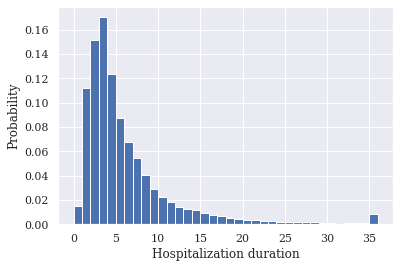

In [62]:
# sns.histplot(full_df['HospitalDuration'].map(lambda x: x.days),bins=range(37),stat='probability')
# plt.ylabel('Probability')
# plt.xlabel('Hospitalization duration')

ax = plt.hist(full_df['HospitalDuration'],bins=range(37), density=True)
plt.ylabel('Probability')
plt.xlabel('Hospitalization duration')

Text(0.5, 0, 'Claim Duration')

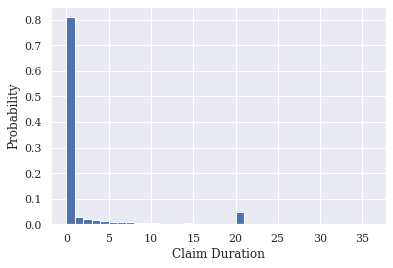

In [69]:
# sns.histplot(ip_df['ClaimDuration'].map(lambda x: x.days),bins=range(37),stat='probability')
# plt.ylabel('Probability')
# plt.xlabel('Claim duration')

ax = plt.hist(full_df['ClaimDuration'],bins=range(37), density=True)
plt.ylabel('Probability')
plt.xlabel('Claim Duration')

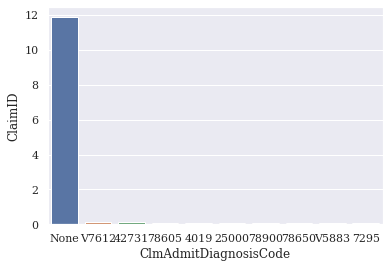

In [70]:
mydf=pd.DataFrame(full_df.groupby('ClmAdmitDiagnosisCode').
                       ClaimID.count().sort_values(ascending=False)).head(10)
mydf.reset_index(inplace=True)
sns.barplot(x='ClmAdmitDiagnosisCode',y=mydf.ClaimID/50025,
            data=mydf)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

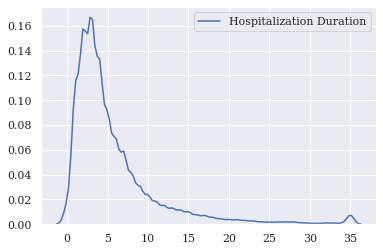

In [71]:
fig, ax = plt.subplots()

sns.kdeplot(full_df['HospitalDuration'], label = 'Hospitalization Duration', ax=ax)
sns.kdeplot(full_df['ClaimDuration'], label = 'Claim Duration',ax=ax)
plt.xlabel('Duration (days)')
plt.legend()

Text(0.5, 0, 'Claim Duration')

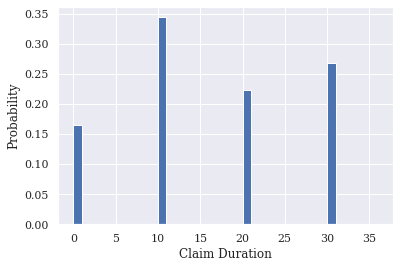

In [74]:
# sns.histplot(full['InscClaimAmtReimbursed'],stat='probability')
# plt.ylabel('Probability')
# plt.xlabel('Reimbursement from insurnace (dollars)')

ax = plt.hist(full_df['InscClaimAmtReimbursed'],bins=range(37), density=True)
plt.ylabel('Probability')
plt.xlabel('Claim Duration')

Text(0.5, 0, 'Claim Duration')

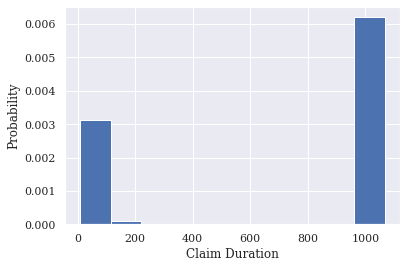

In [75]:
# sns.histplot(full_df['DeductibleAmtPaid'][ip_df.DeductibleAmtPaid>0],stat='probability')
# plt.ylabel('Probability')
# plt.xlabel('Paid deductible (dollars)')

ax = plt.hist(full_df['DeductibleAmtPaid'][full_df.DeductibleAmtPaid>0], density=True)
plt.ylabel('Probability')
plt.xlabel('Claim Duration')

In [43]:
full_df['DeductibleAmtPaid']

0         1068.0
1         1068.0
2         1068.0
3         1068.0
4         1068.0
           ...  
806488       0.0
806489       0.0
806490       0.0
806491       0.0
806492       0.0
Name: DeductibleAmtPaid, Length: 806493, dtype: float64

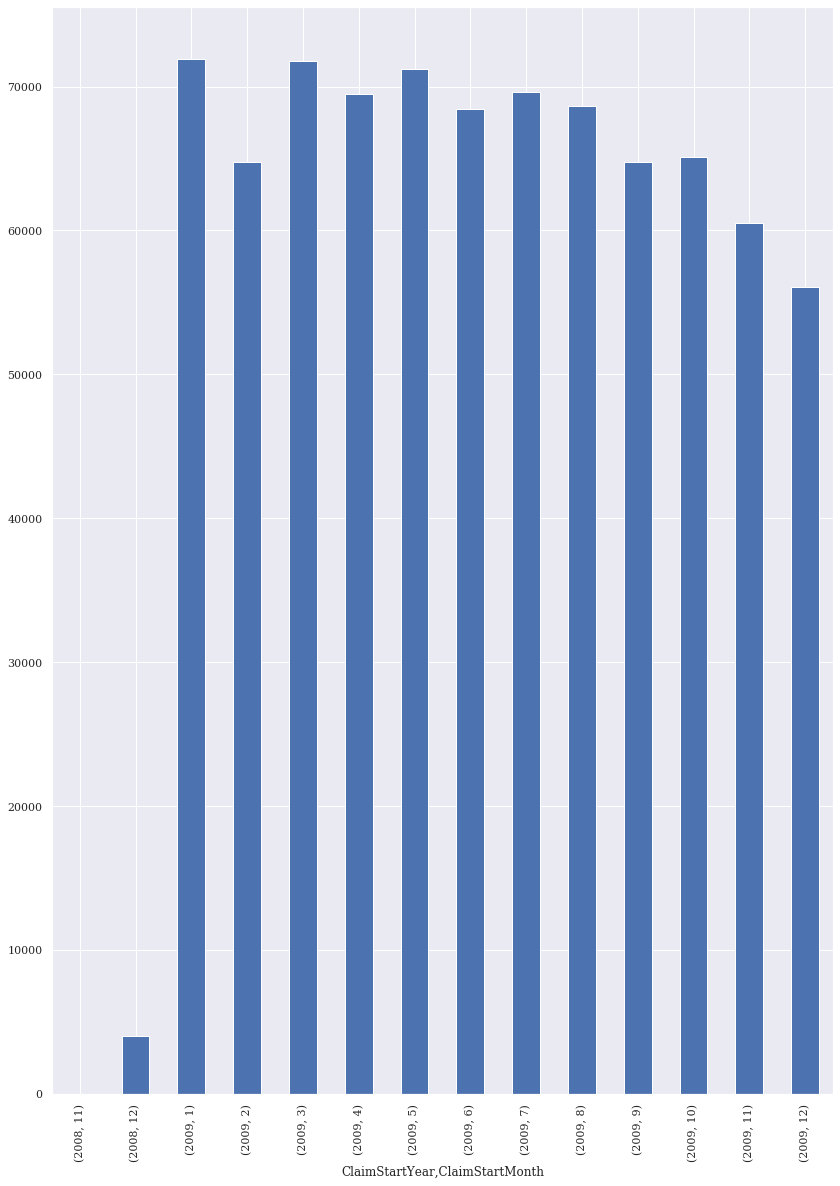

In [45]:

full_df['ClaimStartMonth'] = full_df['ClaimStartDt'].map(lambda x: x.month)
full_df['ClaimStartYear'] = full_df['ClaimStartDt'].map(lambda x: x.year)
full_df.groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))

In [46]:
dir(full_df.ClaimStartDt[1])

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'ctime',
 'day',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'min',
 'month',
 'replace',
 'resolution',
 'strftime',
 'timetuple',
 'today',
 'toordinal',
 'weekday',
 'year']

In [77]:
op_test = pd.read_csv("Test_Outpatientdata-1542969243754.csv")
op_train = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

# Combine test and train set
op_df = pd.concat((op_train, op_test)).reset_index(drop=True)

# Imputing NA values with None (should only be None)
op_df.fillna('None', inplace = True)

# Convert dates into datetime
from datetime import datetime
op_df = op_df.astype(str)
op_df['ClaimStartDt'] = op_df['ClaimStartDt'].map(lambda x: date.fromisoformat(x))
op_df['ClaimEndDt'] = op_df['ClaimEndDt'].map(lambda x: date.fromisoformat(x))
op_df['Claimduration'] = op_df['ClaimEndDt'] - op_df['ClaimStartDt']
op_df['Claimduration'] = op_df['Claimduration'].map(lambda x: x.days)

# Make a column called month for the month of claim
op_df['ClaimMonth'] = op_df['ClaimStartDt'].map(lambda x: x.month)

# Change Dollar amount to float type
op_df['InscClaimAmtReimbursed'] = op_df['InscClaimAmtReimbursed'].astype(float)
op_df['DeductibleAmtPaid'] = op_df['DeductibleAmtPaid'].astype(float)


In [78]:
op_df.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claimduration,ClaimMonth
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30.0,PHY326117,None,None,78943,...,None,None,None,None,None,None,0.0,56409,0,10
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80.0,PHY362868,None,None,6115,...,None,None,None,None,None,None,0.0,79380,0,2
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10.0,PHY328821,None,None,2723,...,None,None,None,None,None,None,0.0,None,0,6
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40.0,PHY334319,None,None,71988,...,None,None,None,None,None,None,0.0,None,0,1
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200.0,PHY403831,None,None,82382,...,None,None,None,None,None,None,0.0,71947,0,1
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20.0,PHY339887,None,None,20381,...,None,None,None,None,None,None,0.0,None,0,2
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40.0,PHY345721,None,None,V6546,...,None,None,None,None,None,None,0.0,None,0,3
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200.0,PHY346833,None,PHY346833,72290,...,None,None,None,None,None,None,0.0,None,0,3
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60.0,PHY372925,None,PHY311407,71856,...,None,None,None,None,None,None,0.0,None,20,4
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500.0,PHY412904,None,PHY396473,7237,...,None,None,None,None,None,None,0.0,None,12,5


In [107]:
ip_df.sort_values(by='ClaimStartDt')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,HospitalDuration,ClaimDuration
34248,BENE136624,CLM31004,2008-11-27,2009-01-01,PRV55897,51000.0,PHY407408,PHY366859,None,2008-11-27,...,41400,None,9904.0,3843.0,None,None,None,None,35 days,35 days
45783,BENE93459,CLM31003,2008-11-27,2009-01-01,PRV52969,56000.0,PHY431038,PHY374974,None,2008-11-27,...,34839,None,9672.0,None,None,None,None,None,35 days,35 days
26762,BENE109092,CLM31001,2008-11-27,2009-01-01,PRV55832,10000.0,PHY402579,None,PHY402579,2008-11-27,...,V142,None,None,None,None,None,None,None,35 days,35 days
47732,BENE124211,CLM31002,2008-11-27,2009-01-01,PRV54264,12000.0,PHY372370,PHY314209,None,2008-11-27,...,29410,None,3893.0,None,None,None,None,None,35 days,35 days
19565,BENE82606,CLM31006,2008-11-28,2009-01-02,PRV56588,18000.0,PHY356371,PHY415979,None,2008-11-28,...,2761,None,3249.0,None,None,None,None,None,35 days,35 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46837,BENE110546,CLM80997,2009-12-30,2009-12-31,PRV52338,16000.0,PHY373222,PHY357413,None,2009-12-30,...,2724,None,3409.0,None,None,None,None,None,1 days,1 days
46517,BENE105444,CLM81002,2009-12-30,2009-12-31,PRV54751,2000.0,PHY413350,None,None,2009-12-30,...,None,None,None,None,None,None,None,None,1 days,1 days
32807,BENE131043,CLM81003,2009-12-30,2009-12-31,PRV54772,8000.0,PHY348341,PHY328475,None,2009-12-30,...,None,None,309.0,None,None,None,None,None,1 days,1 days
32656,BENE130494,CLM81004,2009-12-31,2009-12-31,PRV54881,700.0,PHY425280,None,None,2009-12-31,...,None,None,None,None,None,None,None,None,0 days,0 days


In [108]:
np.floor(6/7)

0.0

In [109]:
week0Mon=date(2008,11,24)

In [114]:
ip_df['ClaimWeek'] = ip_df['ClaimStartDt'].map(lambda x: (x-week0Mon).days//7)

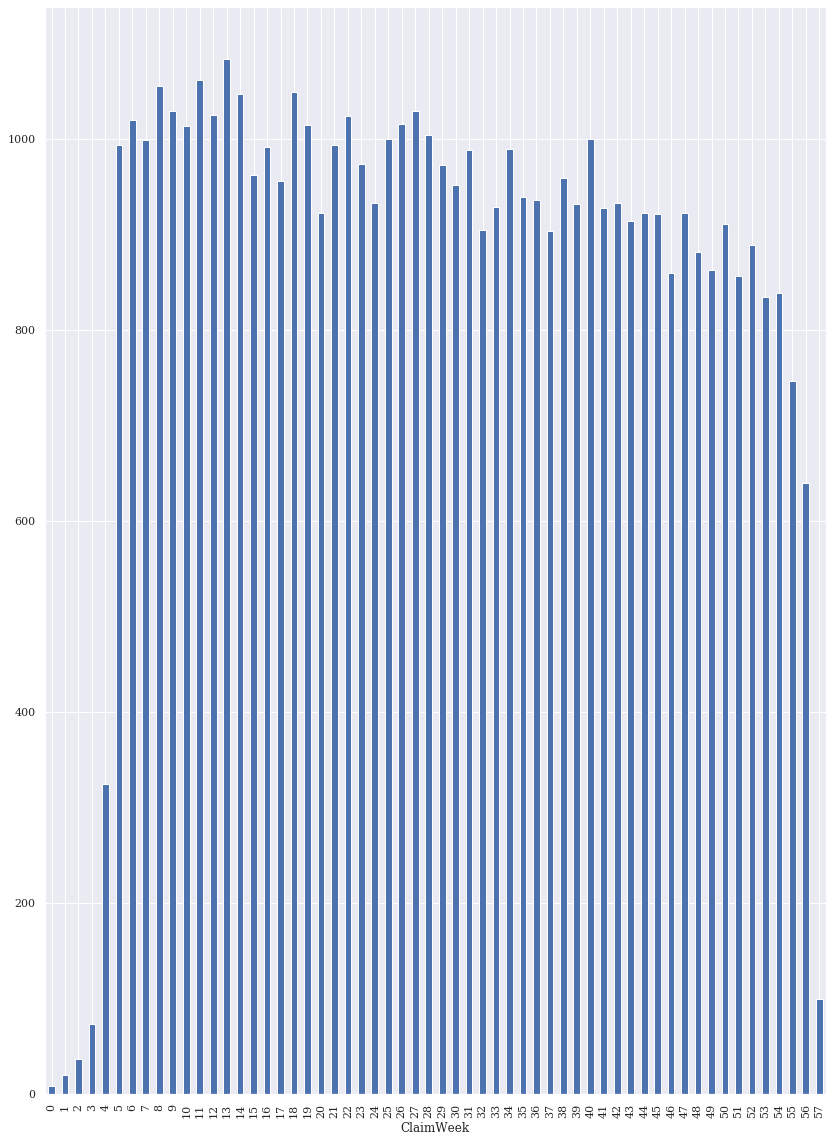

In [111]:
ip_df.groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

In [117]:
op_df['ClaimWeek'] = op_df['ClaimStartDt'].map(lambda x: (x-week0Mon).days//7)

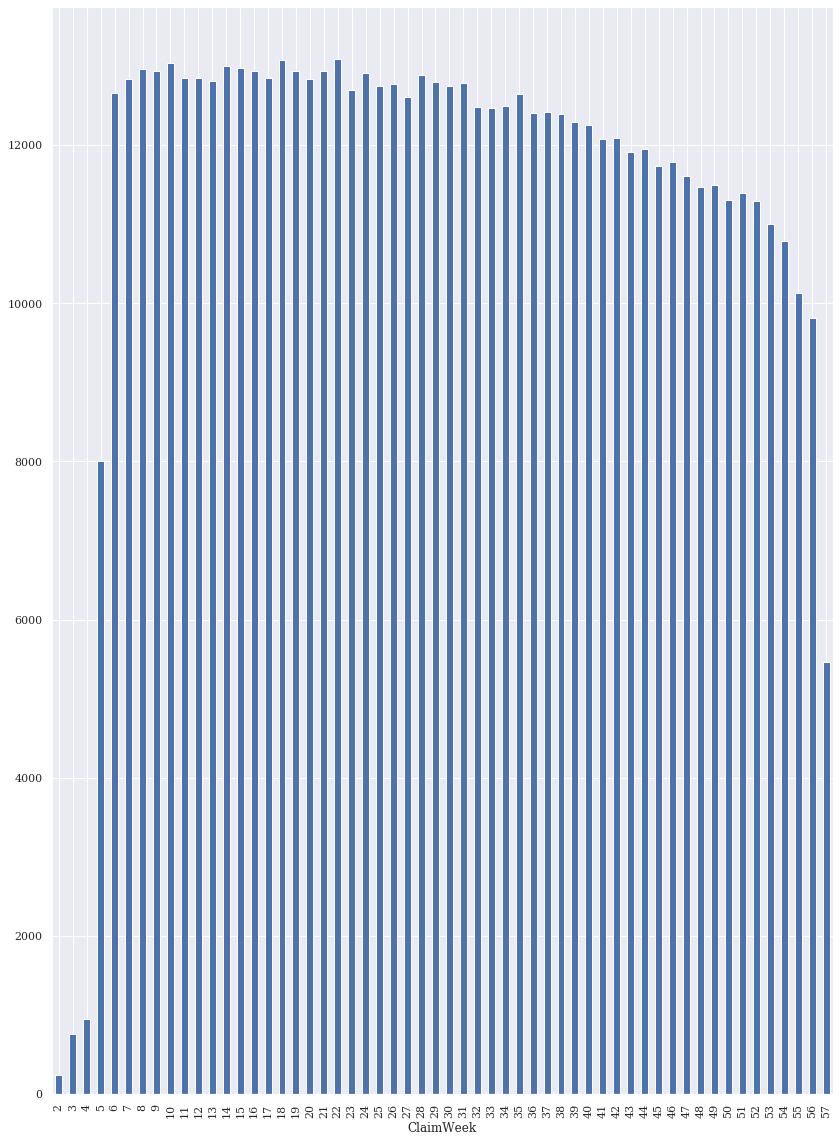

In [119]:
op_df.groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

In [ ]:
ip_df['StartWeekDay'] = ip_df['ClaimStartDt'].map(lambda x: np.remainder((x-week0Mon).days,7))

In [ ]:
ip_df.groupby(['StartWeekDay']).ClaimID.count().plot(kind='bar',figsize=(14,20))

# 0 is Monday

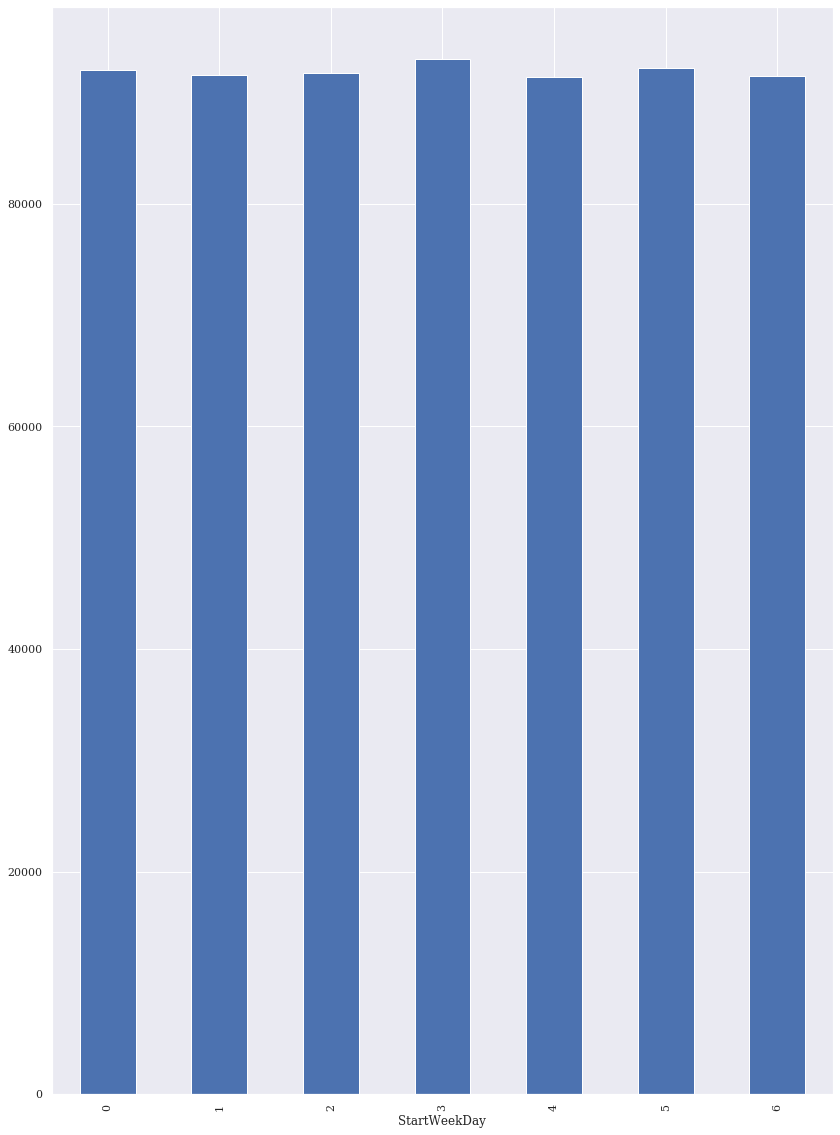

In [120]:
op_df['StartWeekDay'] = op_df['ClaimStartDt'].map(lambda x: np.remainder((x-week0Mon).days,7))
op_df.groupby(['StartWeekDay']).ClaimID.count().plot(kind='bar',figsize=(14,20))


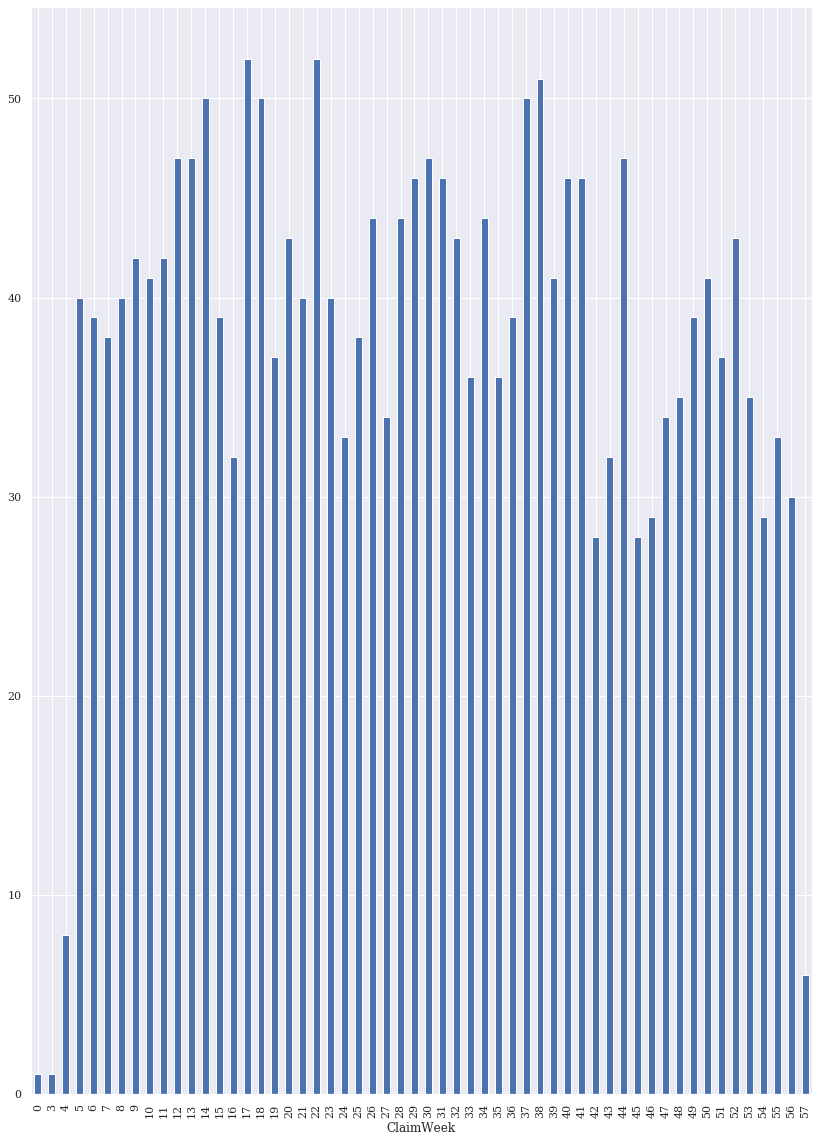

In [121]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='78650',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

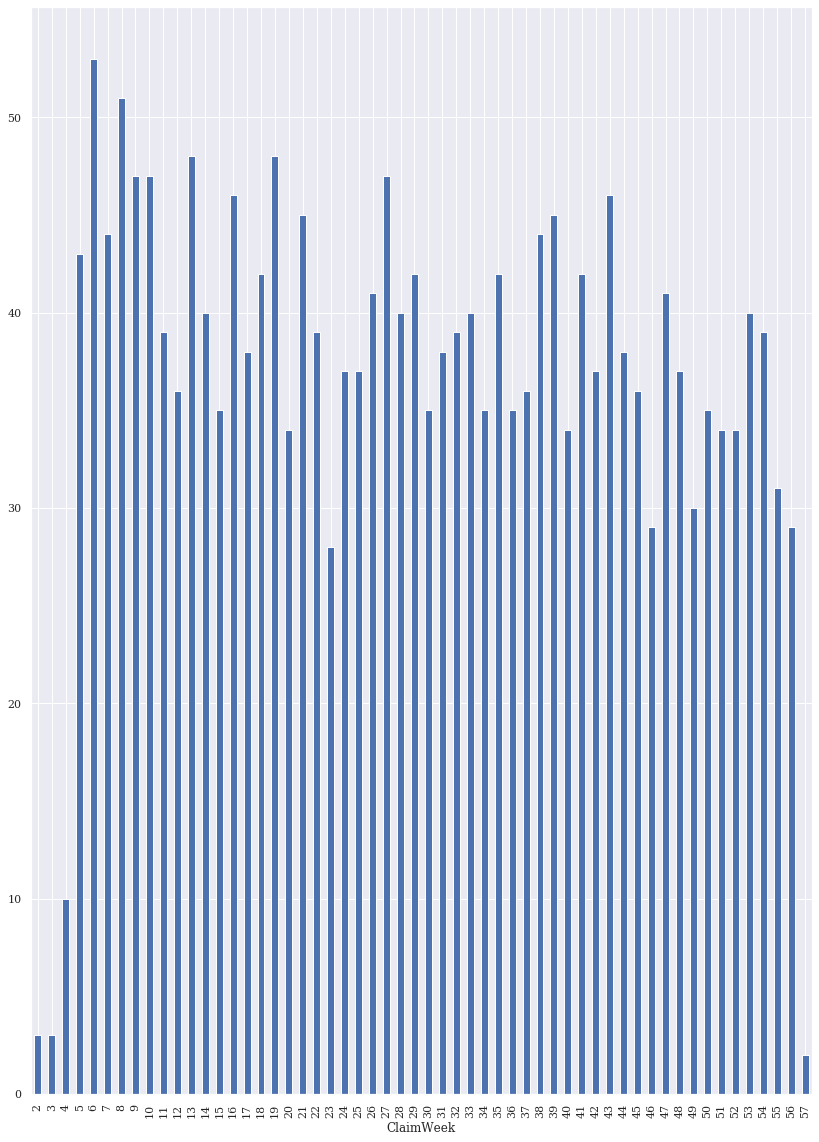

In [122]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='78605',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

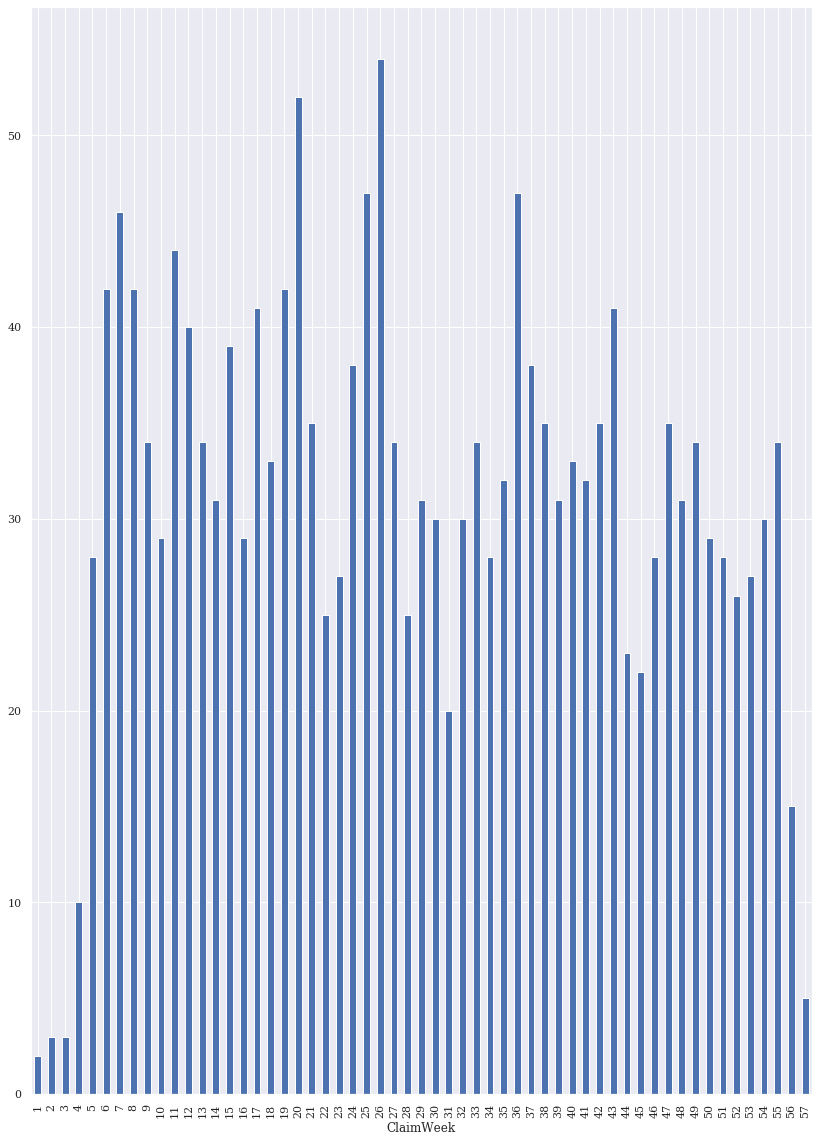

In [123]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='486',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

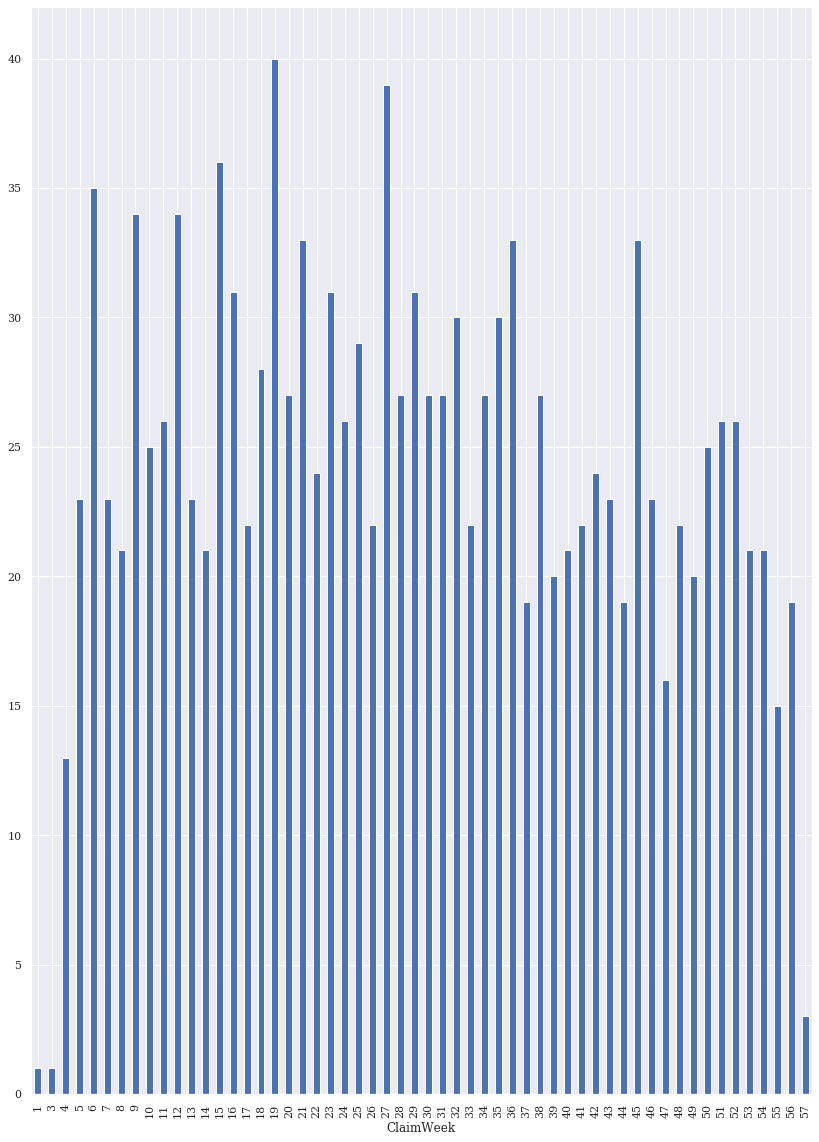

In [124]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='4280',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

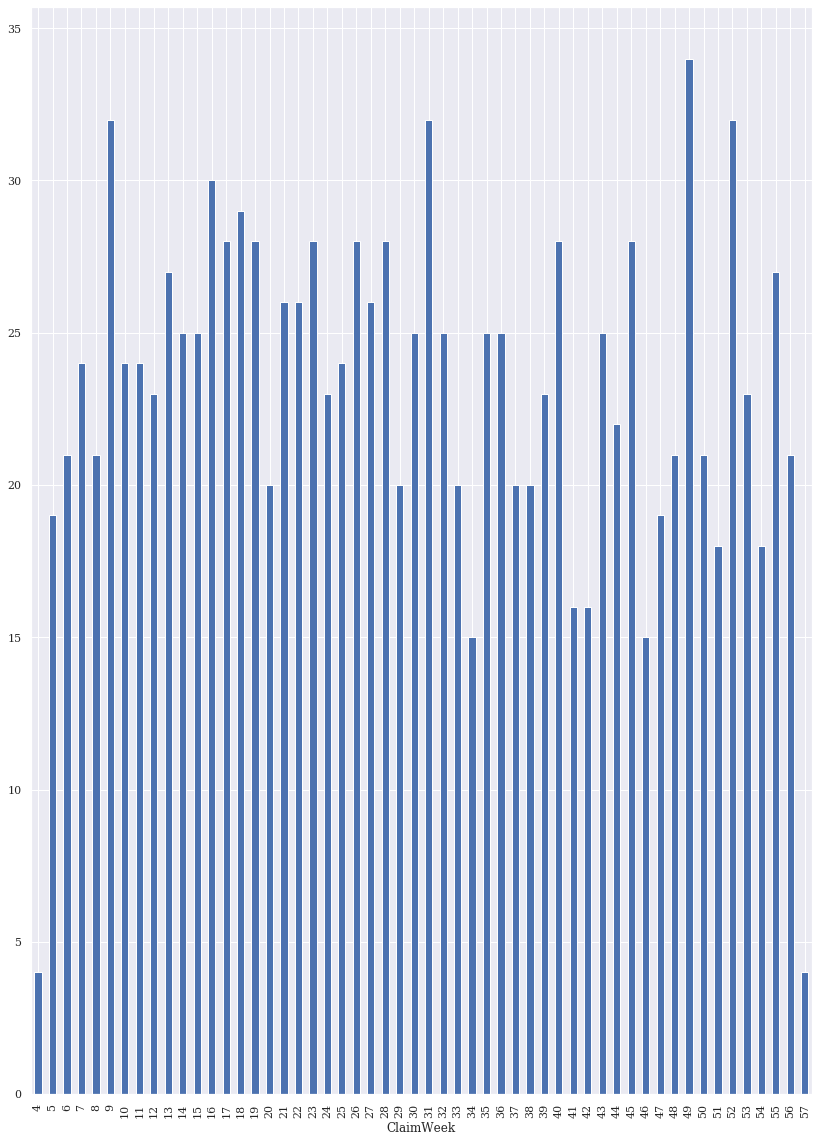

In [125]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='7802',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

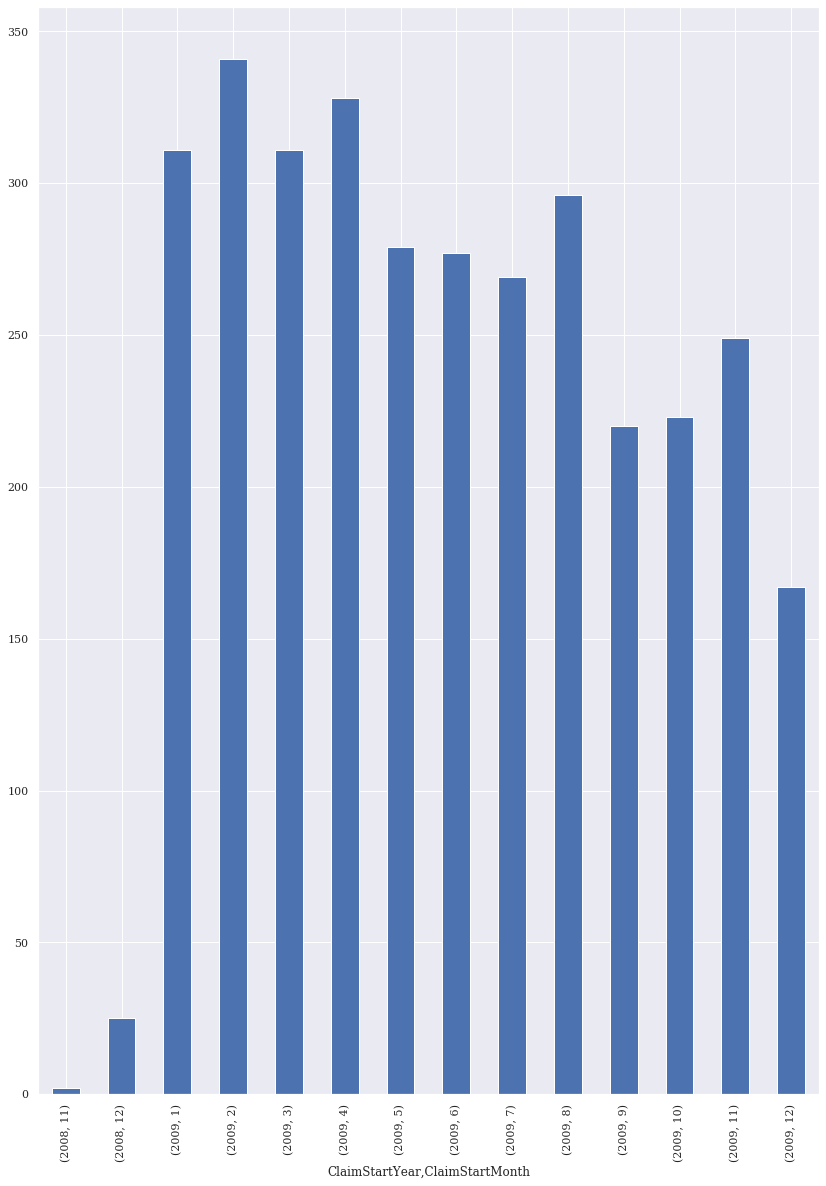

In [127]:
full_df.loc[full_df.ClmAdmitDiagnosisCode=='78650',].groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))

(643578, 31)

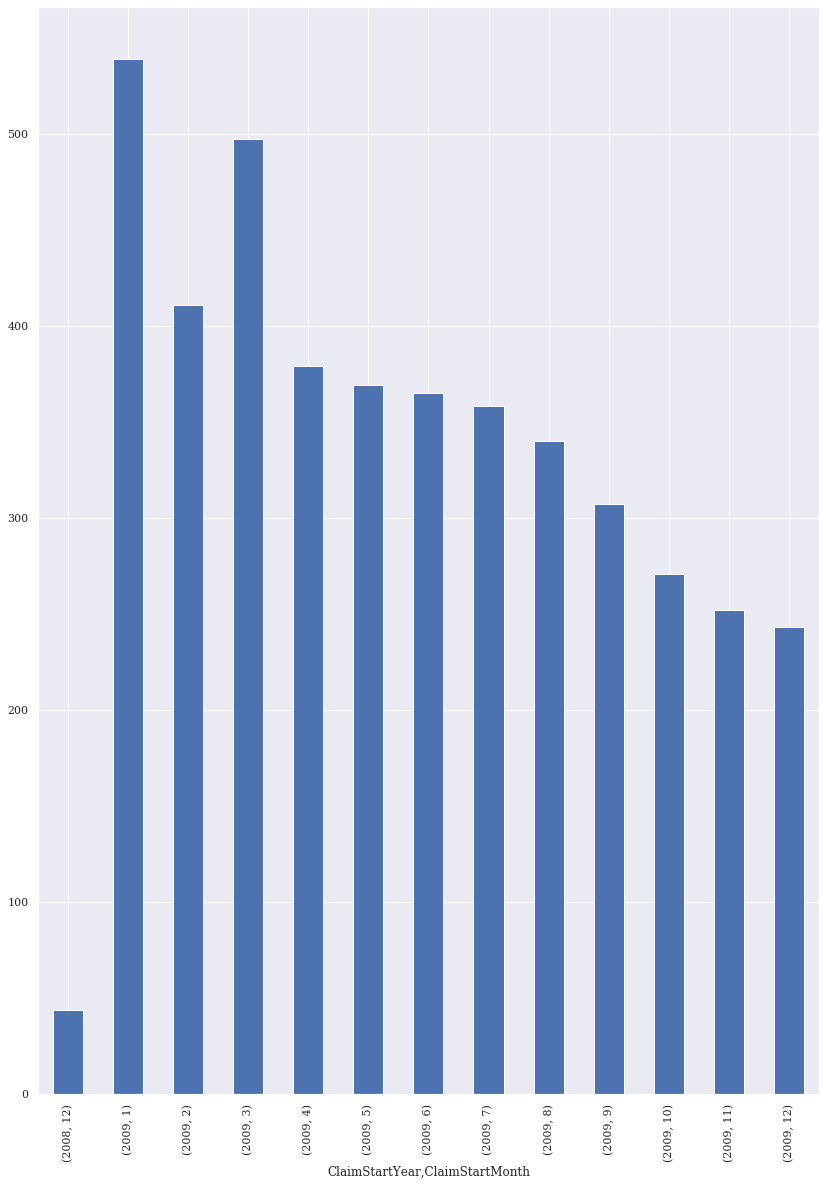

In [128]:
full_df.loc[full_df.ClmAdmitDiagnosisCode=='78605',].groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))
op_df.shape

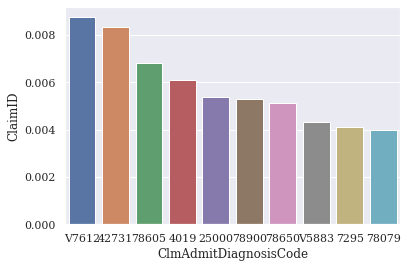

In [129]:
mydf=pd.DataFrame(full_df.loc[full_df.ClmAdmitDiagnosisCode!='None',].groupby('ClmAdmitDiagnosisCode').
                       ClaimID.count().sort_values(ascending=False)).head(10)
mydf.reset_index(inplace=True)
sns.barplot(x='ClmAdmitDiagnosisCode',y=mydf.ClaimID/643578,
            data=mydf)

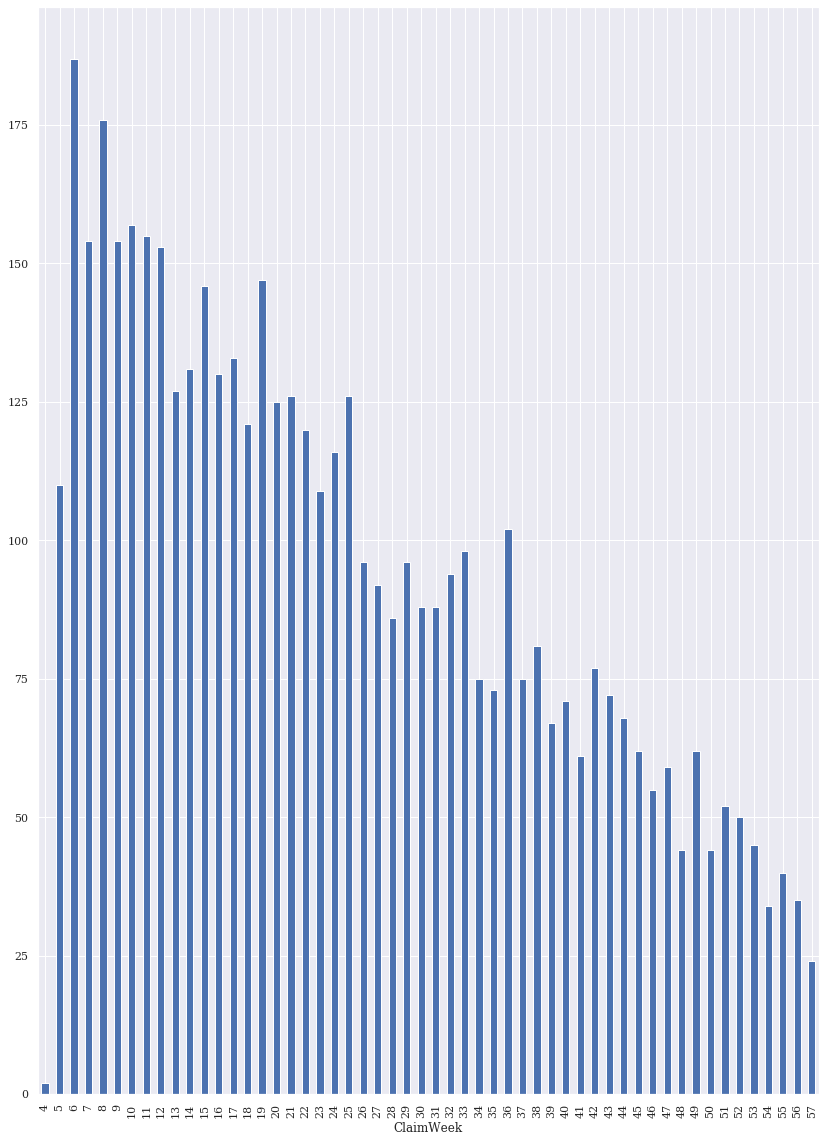

In [133]:
op_df.loc[op_df.ClmAdmitDiagnosisCode=='V7612',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

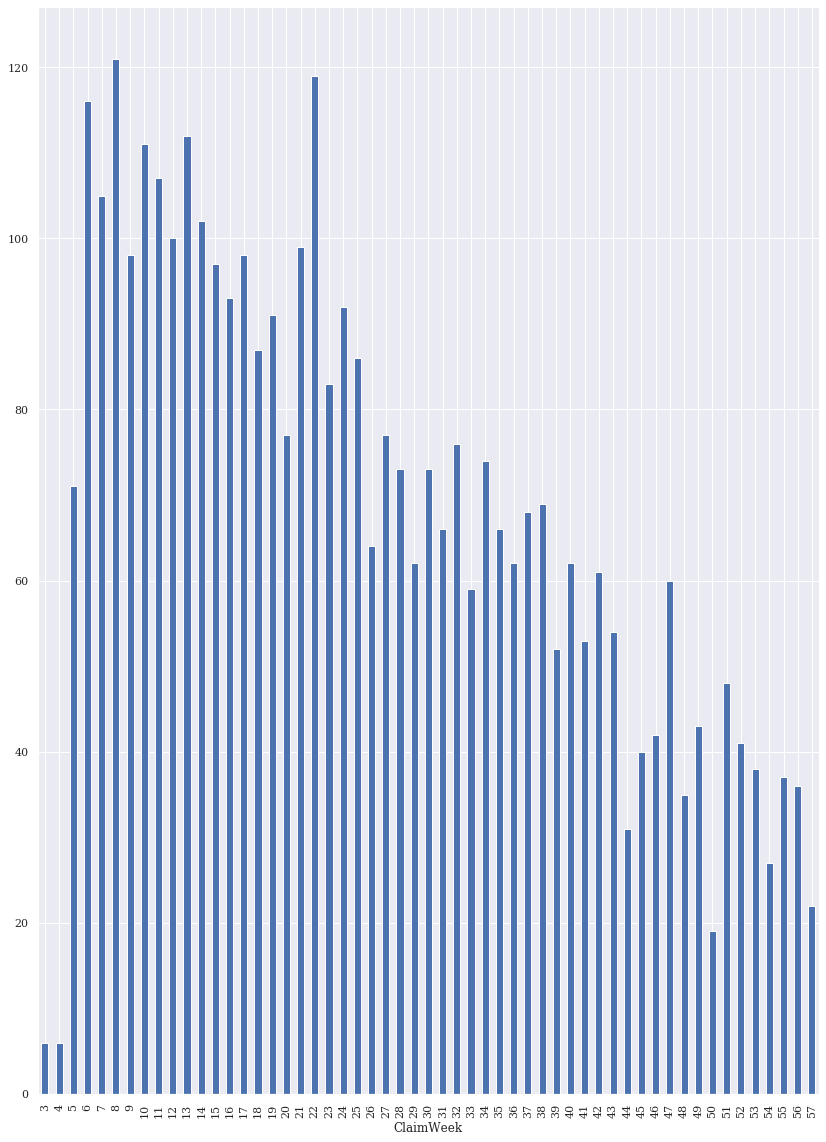

In [146]:
op_df.loc[op_df.ClmAdmitDiagnosisCode=='42731',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

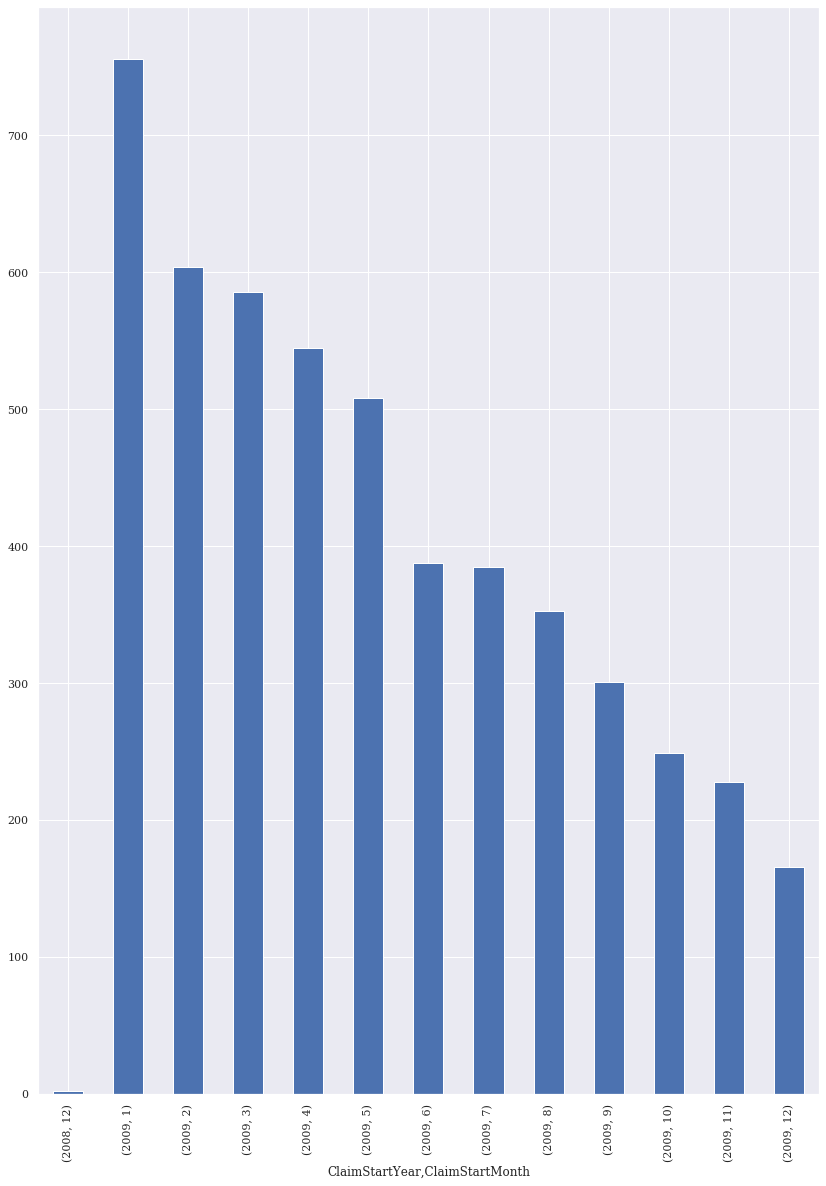

In [143]:
op_df['ClaimStartMonth'] = op_df['ClaimStartDt'].map(lambda x: x.month)
op_df['ClaimStartYear'] = op_df['ClaimStartDt'].map(lambda x: x.year)
op_df.loc[op_df.ClmAdmitDiagnosisCode=='V7612',].groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))


In [136]:
dir(ip_df)

['AdmissionDt',
 'AttendingPhysician',
 'BeneID',
 'ClaimDuration',
 'ClaimEndDt',
 'ClaimID',
 'ClaimStartDt',
 'ClaimWeek',
 'ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_10',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'DiagnosisGroupCode',
 'DischargeDt',
 'HospitalDuration',
 'InscClaimAmtReimbursed',
 'OperatingPhysician',
 'OtherPhysician',
 'Provider',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '

In [139]:
pd.pivot_table(values='ClaimID',data=full_df,columns=['ClaimStartMonth'], index=['Provider'],aggfunc=np.size,fill_value=0).head(20)

ClaimStartMonth,1,2,3,4,5,6,7,8,9,10,11,12
Provider,,,,,,,,,,,,
PRV51001,3,6,5,3,7,3,3,1,2,0,0,3
PRV51003,24,25,17,16,12,21,18,22,16,16,16,9
PRV51004,20,32,27,13,13,17,24,14,17,16,11,24
PRV51005,132,124,147,130,106,142,127,137,144,145,101,110
PRV51007,9,7,13,4,13,11,5,11,10,4,10,10
PRV51008,7,1,9,2,6,5,6,4,5,4,5,5
PRV51011,8,2,9,8,6,7,6,2,10,5,5,9
PRV51012,4,3,6,5,13,20,1,7,2,1,4,5
PRV51013,5,8,9,5,4,2,5,9,8,3,12,7


In [140]:
pd.pivot_table(values='ClaimID',data=full_df,columns=['ClaimStartMonth'], index=['Provider'],aggfunc=np.size,fill_value=0).head(20)

ClaimStartMonth,1,2,3,4,5,6,7,8,9,10,11,12
Provider,,,,,,,,,,,,
PRV51001,3,6,5,3,7,3,3,1,2,0,0,3
PRV51003,24,25,17,16,12,21,18,22,16,16,16,9
PRV51004,20,32,27,13,13,17,24,14,17,16,11,24
PRV51005,132,124,147,130,106,142,127,137,144,145,101,110
PRV51007,9,7,13,4,13,11,5,11,10,4,10,10
PRV51008,7,1,9,2,6,5,6,4,5,4,5,5
PRV51011,8,2,9,8,6,7,6,2,10,5,5,9
PRV51012,4,3,6,5,13,20,1,7,2,1,4,5
PRV51013,5,8,9,5,4,2,5,9,8,3,12,7
